## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
    
%matplotlib inline

In [2]:
#Get datasets
train = ('../datasets/train_cleaned.csv')
test = ('../datasets/test_cleaned.csv')

In [3]:
test = pd.read_csv(test)
train = pd.read_csv(train)

In [4]:
#Annotate test and train sets
df = pd.concat([test,train],ignore_index=True,sort=False)
y = df['SalePrice']
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [5]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,190,RM,69.0,9142,0,Grvl,3,Lvl,3,Inside,...,0,0,0,0,None,0,4,2006,WD,NaN
1,90,RL,0.0,9662,0,None,2,Lvl,3,Inside,...,0,0,0,0,None,0,8,2006,WD,NaN
2,60,RL,58.0,17104,0,None,2,Lvl,3,Inside,...,0,0,0,0,None,0,9,2006,New,NaN
3,30,RM,60.0,8520,0,None,3,Lvl,3,Inside,...,0,0,0,0,None,0,7,2007,WD,NaN
4,20,RL,0.0,9500,0,None,2,Lvl,3,Inside,...,185,0,0,0,None,0,7,2009,WD,NaN


In [6]:
# Subclass although in numbers, should be nominal
df['MS SubClass'] = df['MS SubClass'].astype(object)

In [7]:
# All nominal columns
nom_cols = df.columns[df.dtypes == 'object']
# All continuous columns
cont_cols = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2',
           'Bsmt Unf SF','Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area','Wood Deck SF',
           'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area','Misc Val']
# All ordinal columns
ordinal_cols = ['Street','Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond', 'Exter Qual','Exter Cond',
                'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                'Heating QC','Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu',
               'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']
# All discrete columns
dist_cols = [ 'Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr', 'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold','Yr Sold']
# All year/time related columns
time_cols = ['Year Built','Year Remod/Add','Garage Yr Blt']

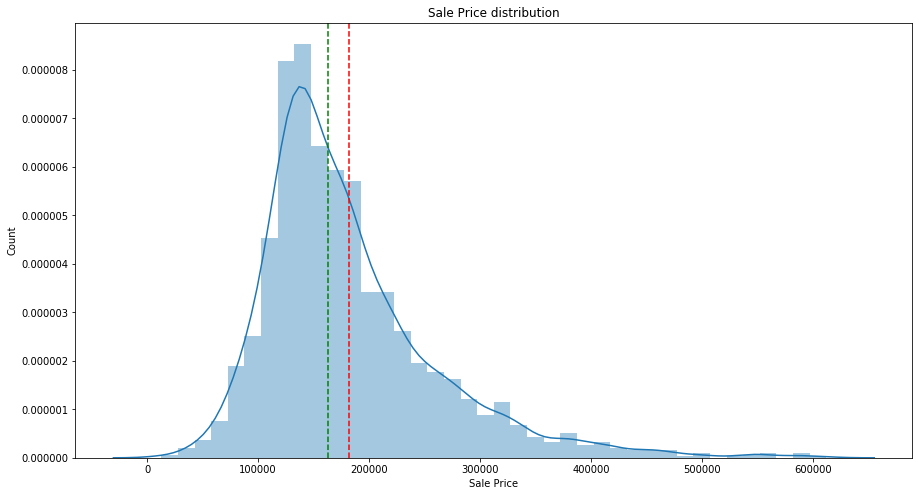

In [9]:
# Look at the distribution of sale prices
fig, axes = plt.subplots(figsize=(15, 8))
sns.distplot(df['SalePrice'], kde=True, bins=40)\
.set(xlabel='Sale Price', ylabel='Count',title="Sale Price distribution");
plt.axvline(df['SalePrice'].mean(), 0,1, ls='--', color = 'red')
plt.axvline(df['SalePrice'].median(), 0,1, ls='--', color = 'green')

plt.show()

## Target column distribution

In this distribution, we can see that the sale price is quite normally distributed, althought it is slightly skewed towards the left, as there are some outliers whose sale price is extremely high. Also from the distribution, the mean of sale price is between 150000, where the mode is around too. Most sale prices range between 100000 to 300000.

In [10]:
#Looking at scatterplots of continuous columns with sale price
def subplot_scatter(df,list_of_titles, list_of_xlabels):
    ncols = 3
    nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 50))
    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]  
            if counter < len(df.columns):      # Plot when we have data
                ax.scatter(df[df.columns[counter]], y)
                ax.set_xlabel(list_of_xlabels[counter])
                ax.set_title(list_of_titles[counter])
                ax.set_ylabel("Price")
        # Remove axis when we no longer have data
            else:
                ax.set_axis_off()

            counter += 1
    plt.tight_layout()
    plt.show()

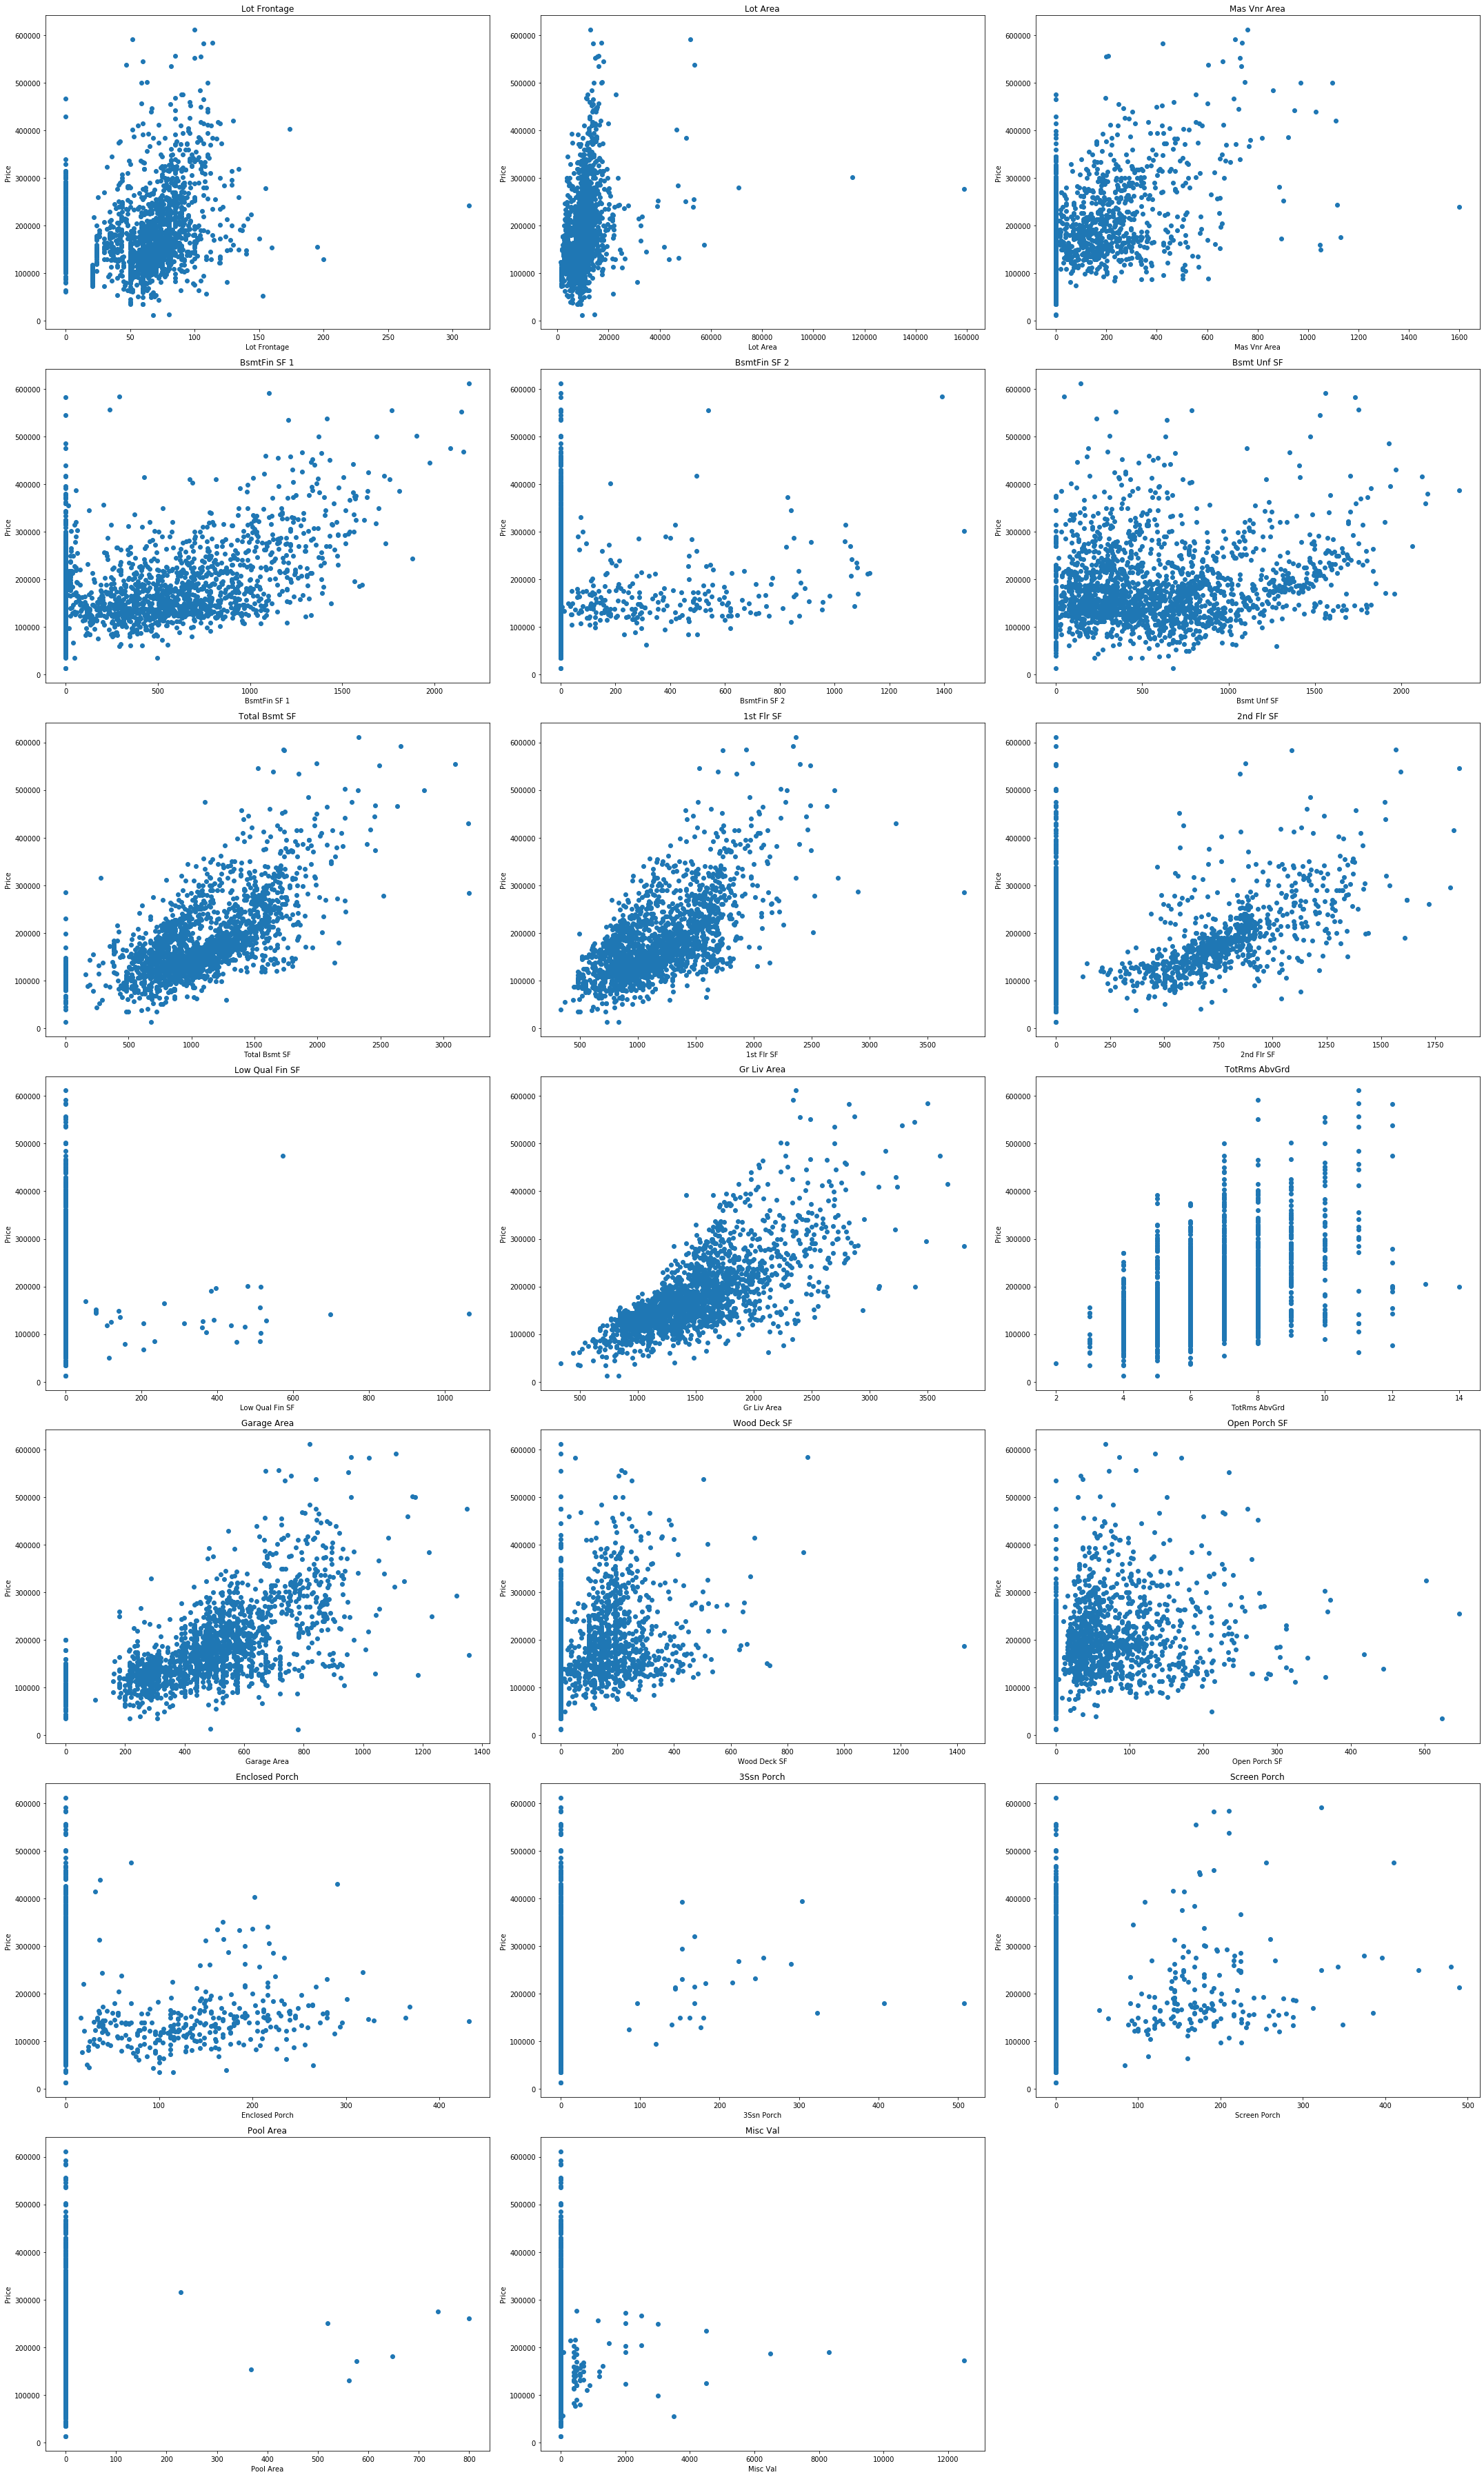

In [11]:
subplot_scatter(df[cont_cols],cont_cols,cont_cols)

## Distribution of continuous features against price
All houses show a general positive trend, where when the feature size increase, so does the sale price. For example, more Gn Liv Area equates to higher sale price. Furthermore, the slope for Lot area feature seems to have the strongest effect on sale price as a small increase in lot area seems to show a greater increase in sale price than other distributions.

However, there are several scatterplots that show how the distributions were heavily skewed towards the lower end of the scale. For example, in the 'Pool Area' columns, we see that most houses do not possess a pool except a handful of a few houses (can be counted; 8). These distributions show that in general, most houses do not possess these miscellaneous features and do not have much effect on the final sale price. 

As for the rest of the distributions, we can see that they generally follow a linear, if not slight exponential distribution against sale price. These features will be considered to possess a stronger relationship with the target column.<br>

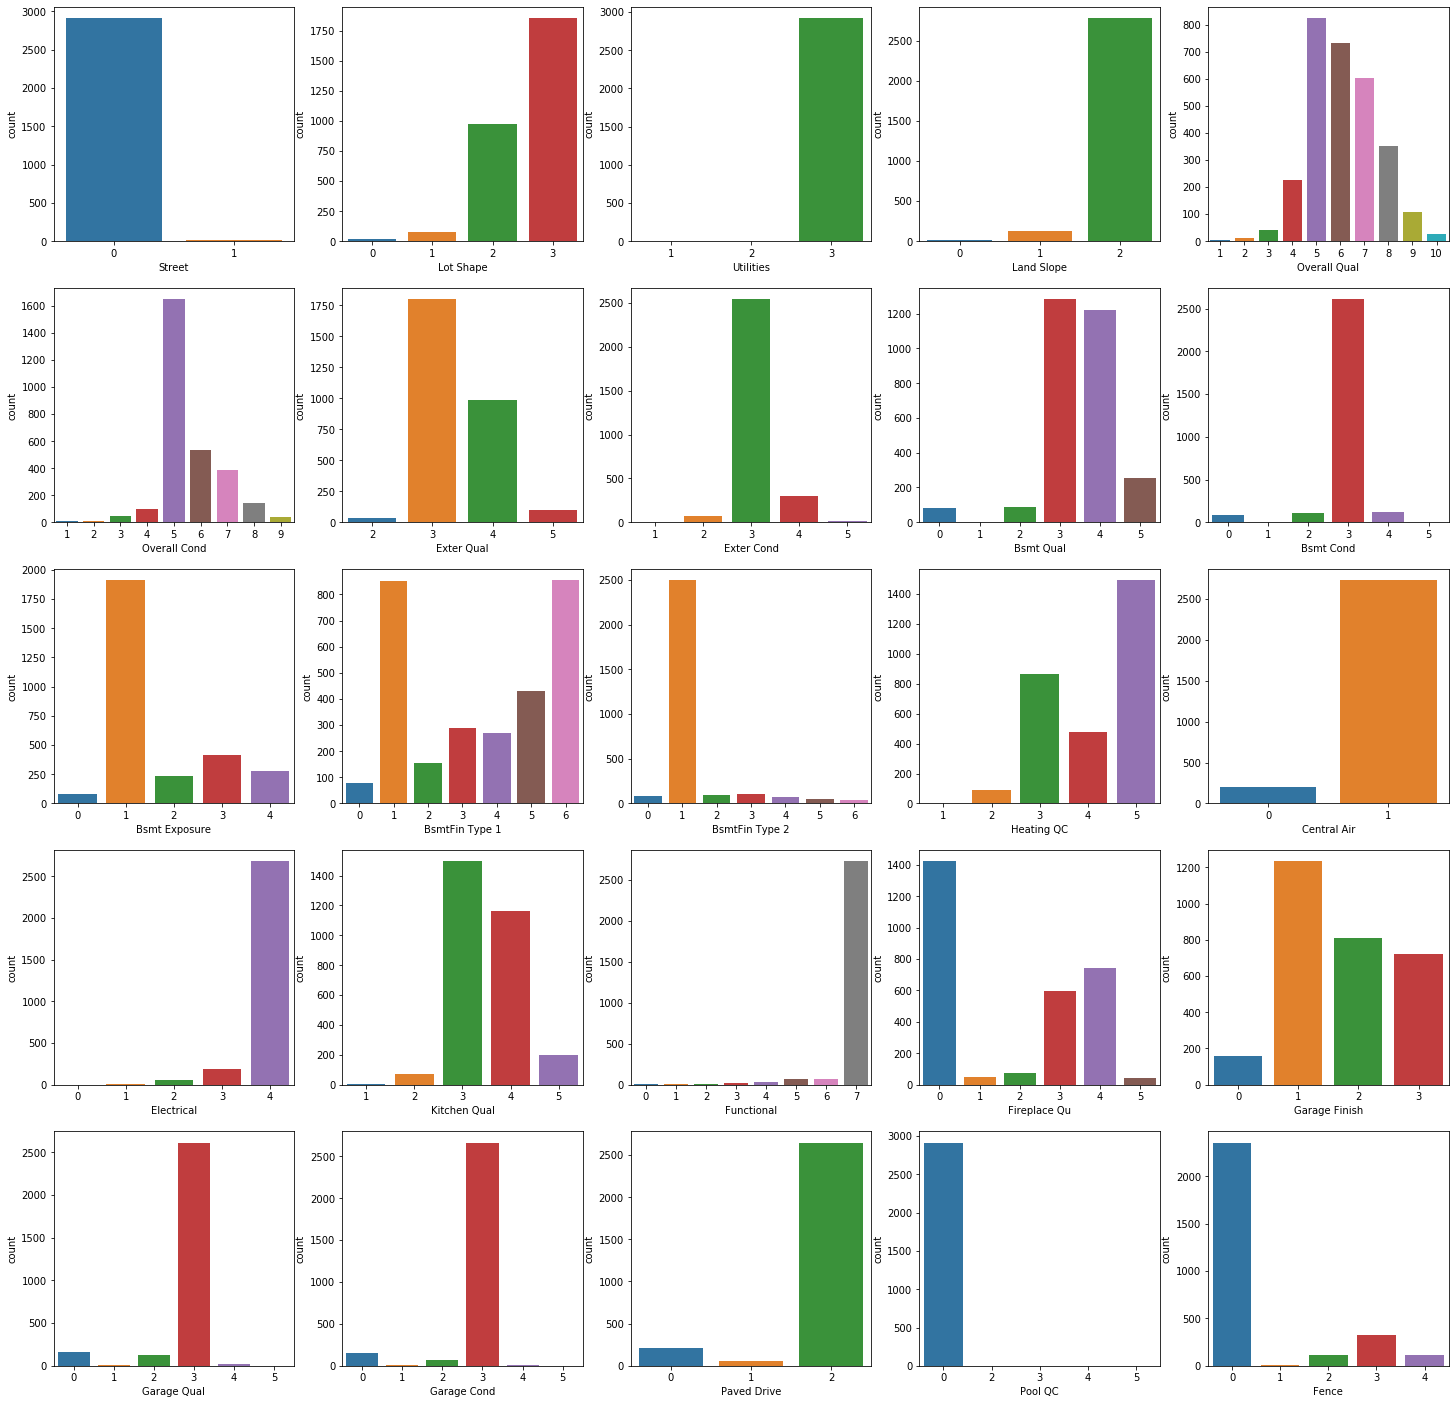

In [12]:
# Plotting the ordinal columns to see their count distribution
fig, ax = plt.subplots(5, 5, figsize=(25, 25))
for variable, subplot in zip(ordinal_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)

## Ordinal columns distribution

These distribution plots show us distinctively which level of quality/condition the houses are. In general, the higher the score, the better the house. Thus, skewness will allow us to determine how well the house perform on these houses. Mainly, we see that if scores are concentrated on the left, the quality or score is low; Opposite is true for scores on the right since this is an ordinal feature.

Importantly to note, most ordinal features then to have modes that are highly dominated in one score, for example in Paved Drive, we see that from the data dictionary, we can tell that most houses have a proper paved driveway, and this number greatly overwhelms the partially paved and no pavement subcategory of 1 and 0 respectively. 

From an overall perspective, we see that the overall condition and overall quality seems to be normally distributed as it takes into account the average of all these other ordinal features. Thus, it might be more reasonable to forgot the other ordinal scales and to just use the overall ordinal feature for building a model.

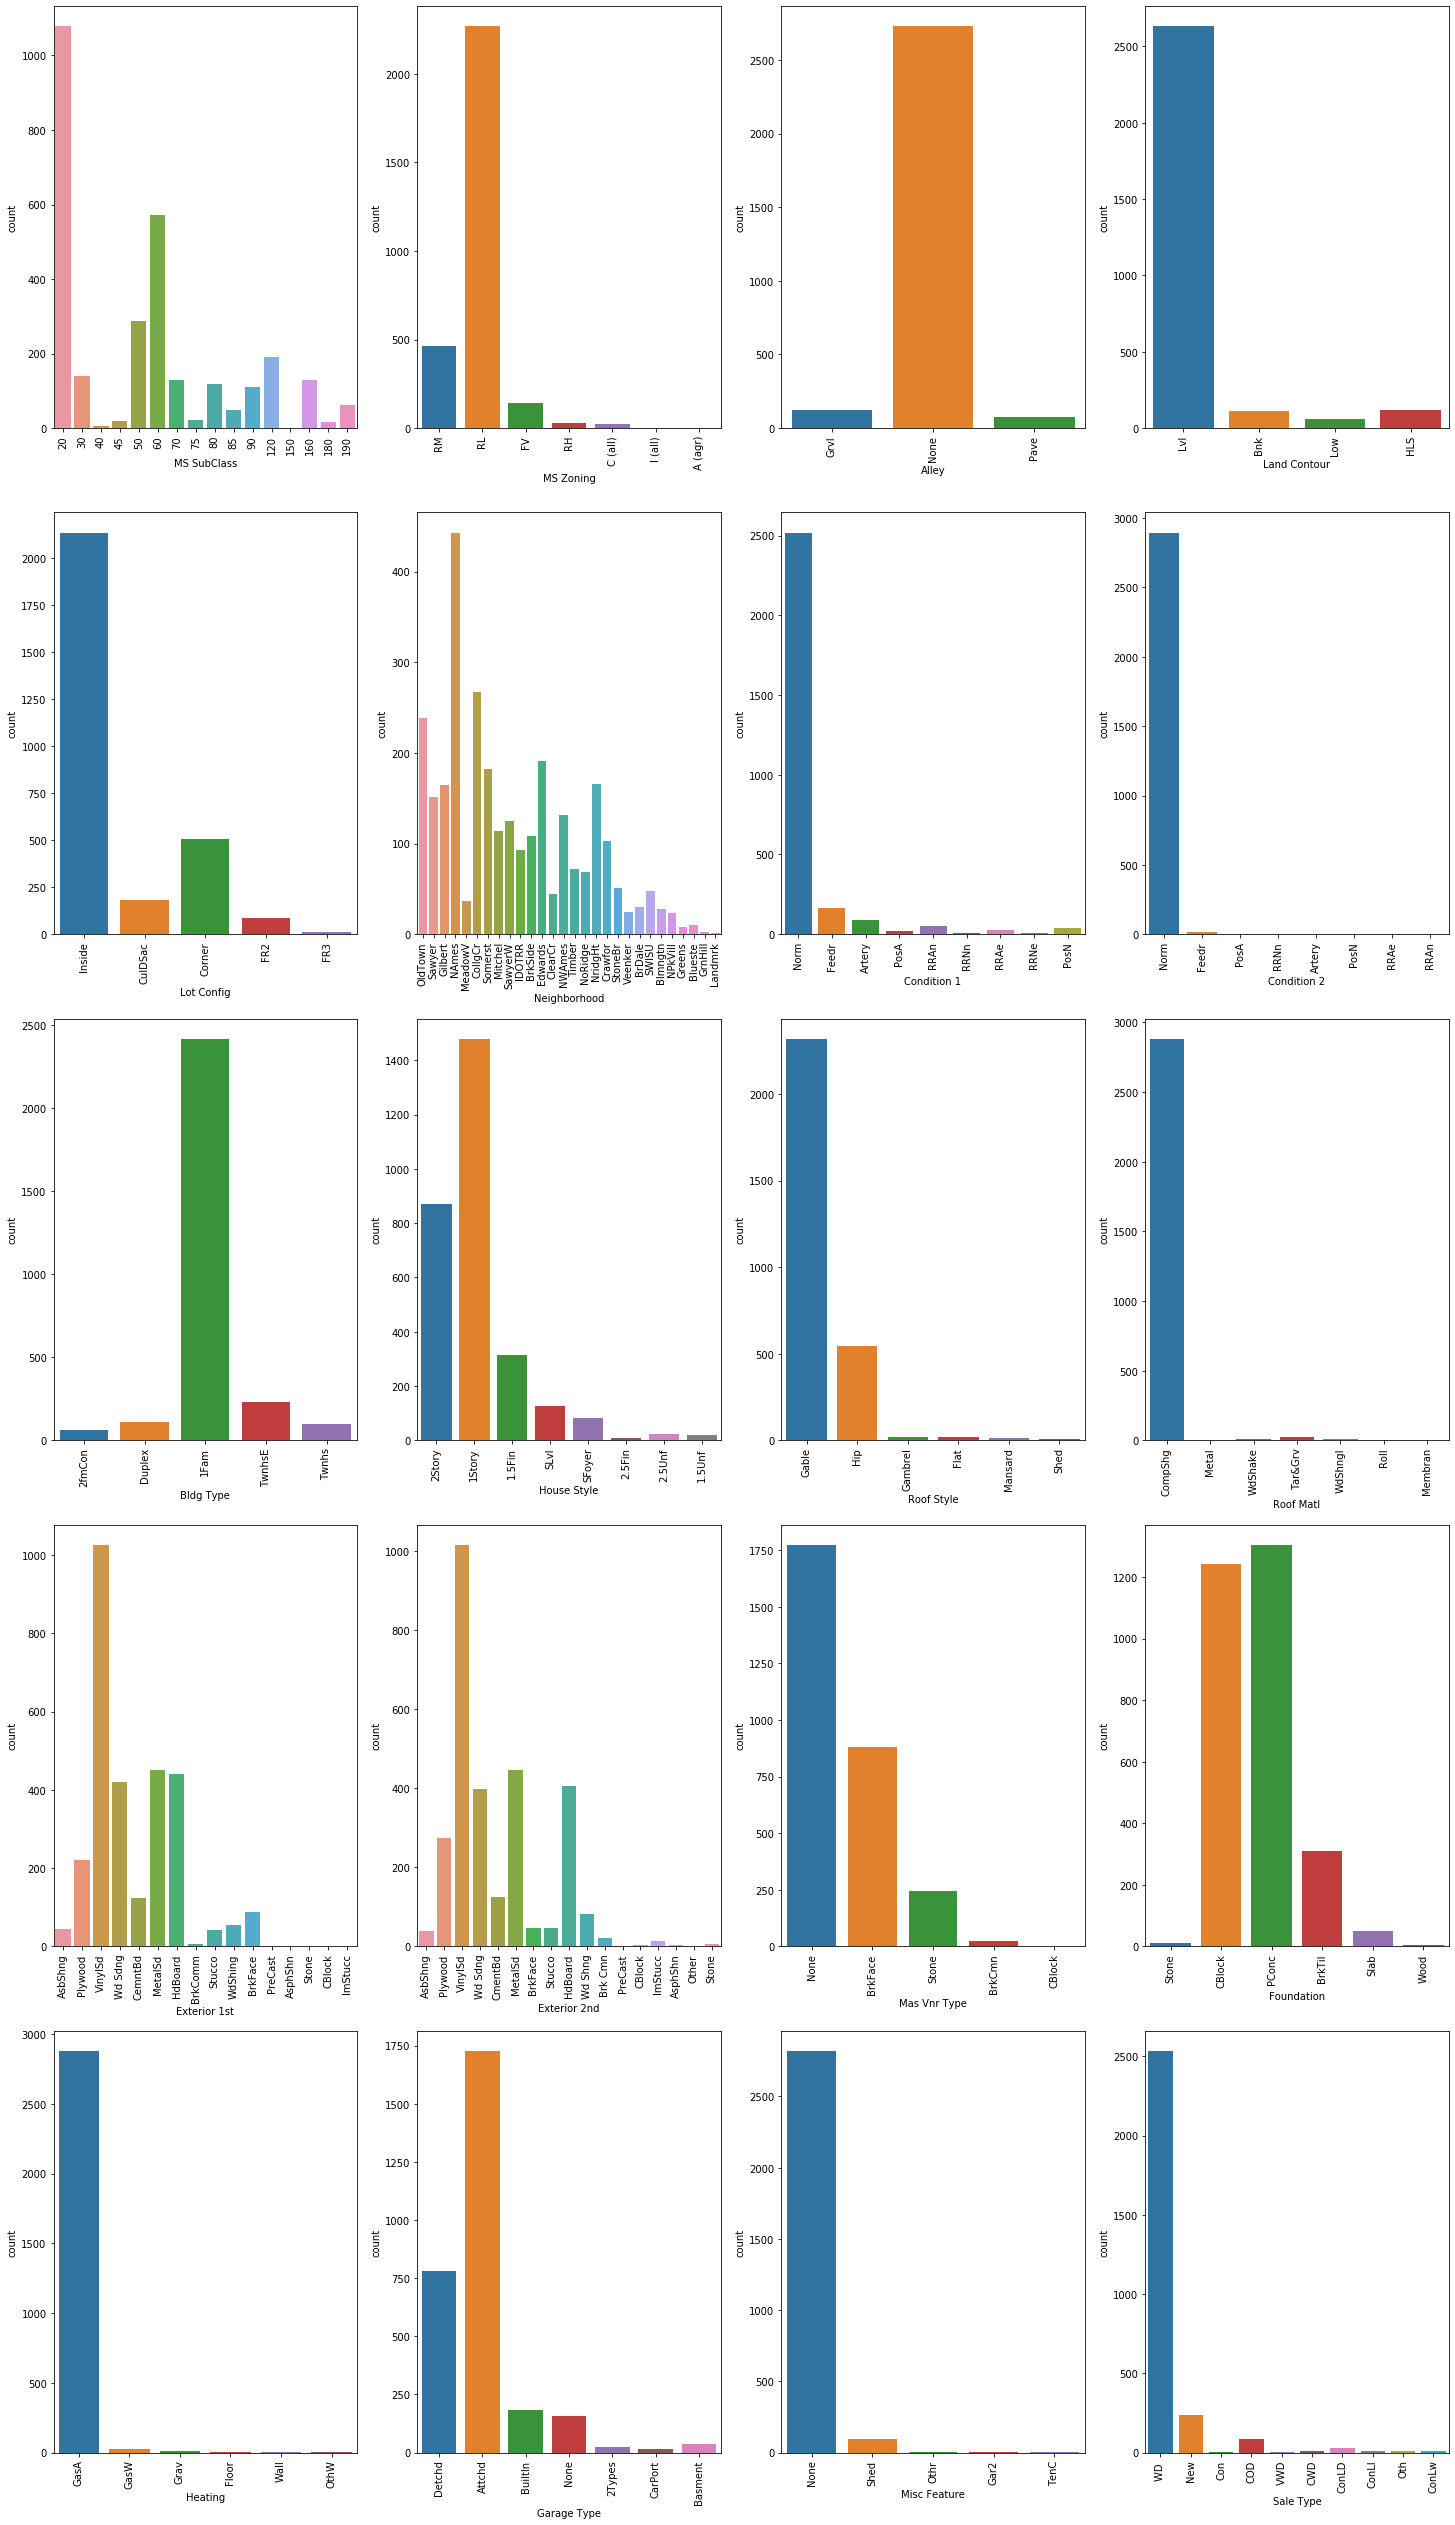

In [14]:
# Plotting the histograms for all norminal columns to see their count distribution
fig, ax = plt.subplots(5, 4, figsize=(25, 45))
for variable, subplot in zip(nom_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Distribution of nominal columns in counts

As seen from the distributions above, most of the graphs are highly biased towards one sub-category within each category of distribution plot. The lack of variance in theses nominal columns suggest that it is unlikely that these features will impact the target value of sales price. Thus, only categories with enough variance will be selected as features for the model. 

In general just to name a few, we can see from glace at these distributions, the most houses sold neighbourhood is NAmes (North Ames), most houses have RL (Residential Low Density) zoning classification, have Regular lot shape, and also have CentralAir.

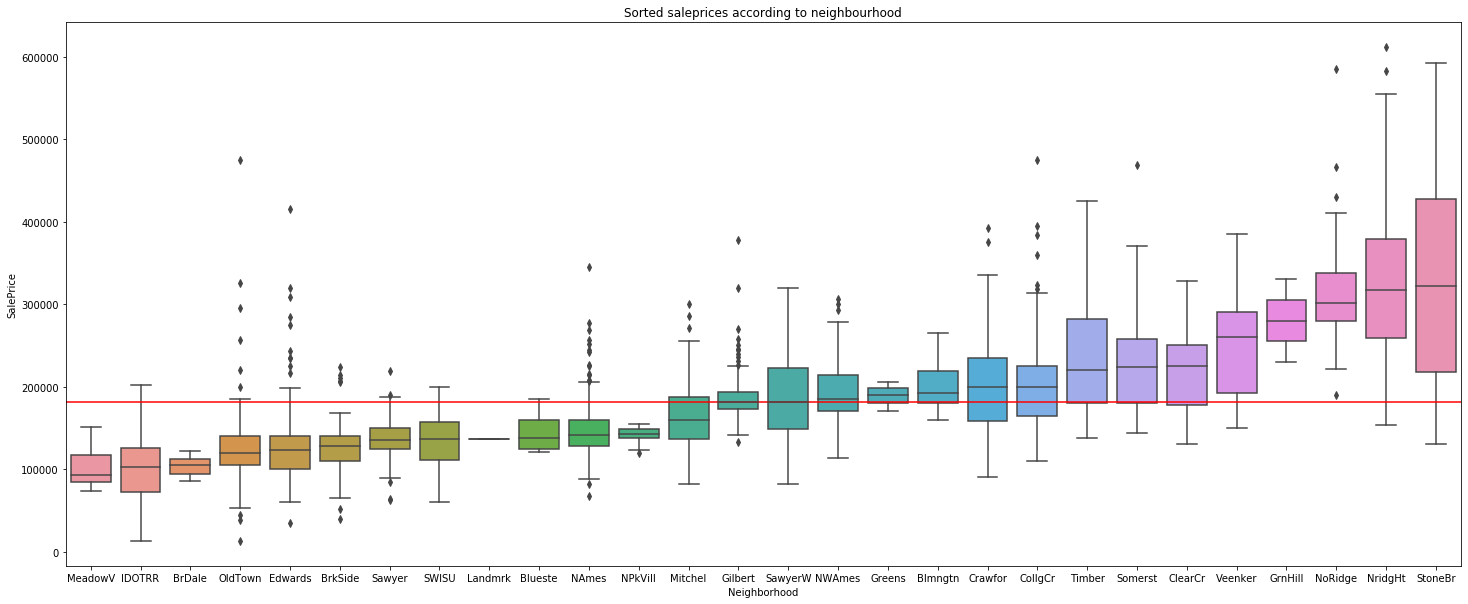

In [15]:
# Looking more indept at neighbourhood with biggest variance between each sub-category
plt.figure(figsize=(25, 10))
sorted_nb = df.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'], order=list(sorted_nb.index)).set(title = 'Sorted saleprices according to neighbourhood')
plt.axhline(df['SalePrice'].mean(),linestyle = '-',color = 'red')
plt.show()

## Boxplot of neighbourhood against sale price
From this figure, we can see that in the cheapest neighborhoods houses sell for a median price of around 100,000, and in the most expensive neighborhoods houses sell for around 300,000. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other. In the most expensive neighborhood NridgHt, however, we see a large box — there is large dispersion in the distribution of prices.

The red line demarkates the distribution of houses with lower and higher than mean sale prices, and we can see the neighbourhoods that are more expensive or relatively cheaper.


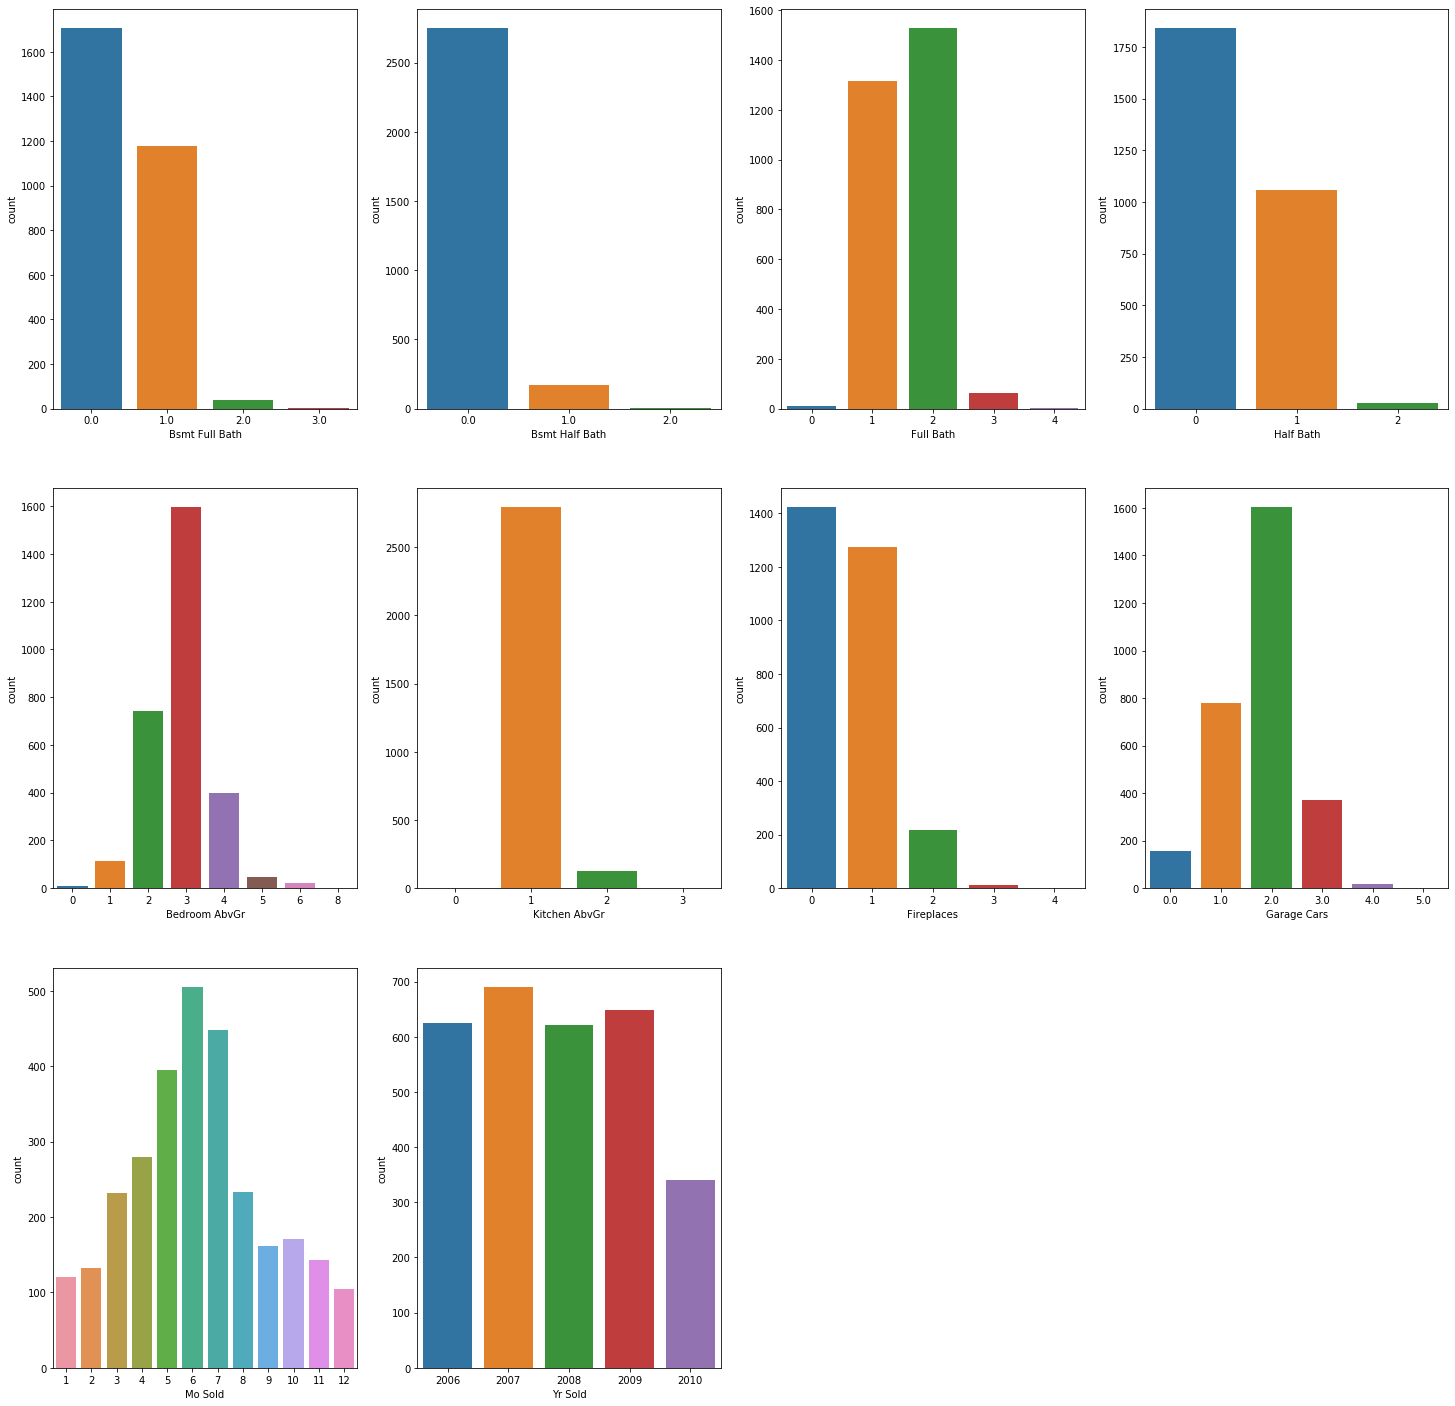

In [16]:
# Plotting the count plots for all discrete columns to see their count distribution
fig, ax = plt.subplots(3, 4, figsize=(25, 25))
for variable, subplot in zip(dist_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
ax[2,2].set_axis_off()
ax[2,3].set_axis_off()

## Distribution of discrete features

A general outlook of these discrete features shows a clear distinct mode for most of them. For example, houses do not have basement bathrooms, have 2 full bathrooms, 2 garage cars, 3 bedrooms, 1 kitchen and 0/1 fireplace. Also, most houses are sold in the month of June.

We can clearly see a dip in sales of houses in 2010, which may be a mis-representation if the data cuts off on the year 2010. Thus, year sold might be a biased feature.

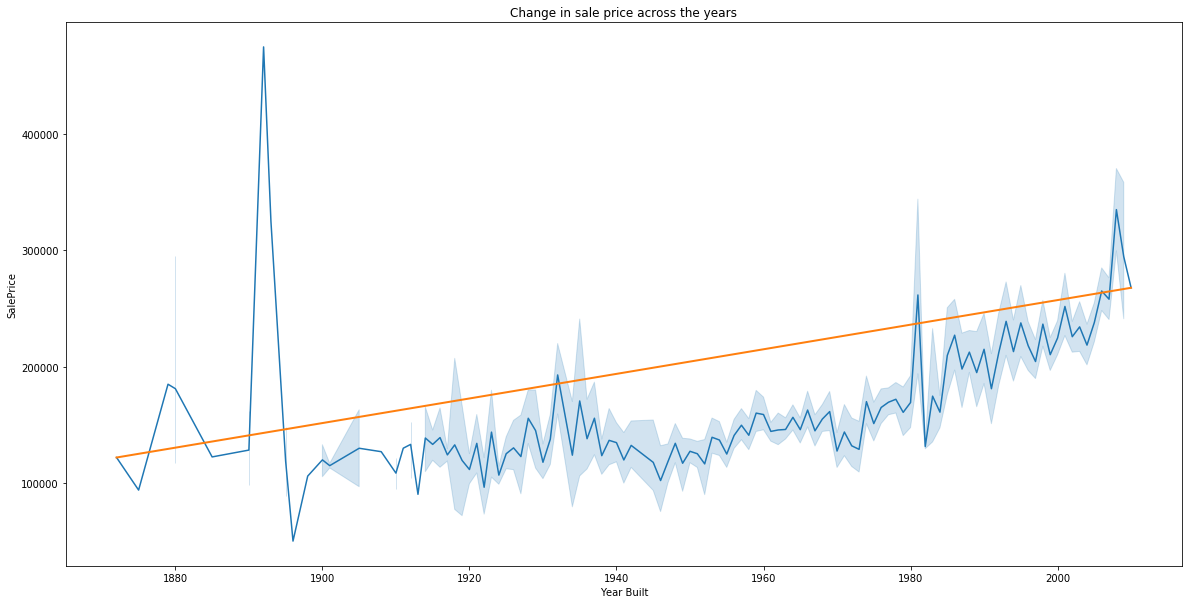

In [24]:
# Look at time sensitive plots
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = df['Year Built'], y = y).set(title = 'Change in sale price across the years')
plt.plot([1872, 2010], [122000, 267916], linewidth=2)
plt.show()

## General trend of across the years of sale prices

Over the years, sale prices has increased of housing has increased. On average from the start of 122k in 1872 to 267k in 2010.

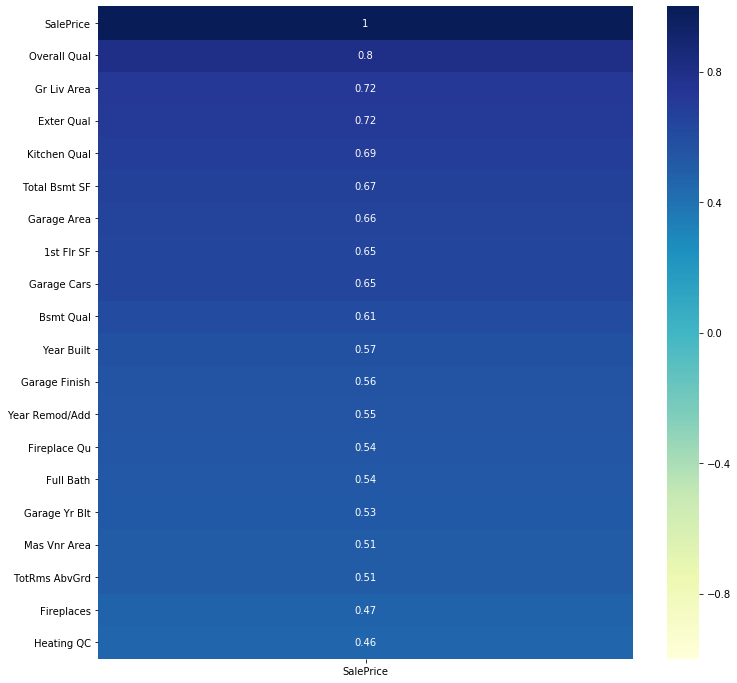

In [25]:
# Several features with top correlation with SalePrice
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice').tail(20),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

## Feature correlation with target

Some of these features have high correlation to the sale price, and might affect the overall model training if these said features are being used with training of the model. Thus, it is likely that these features are not to be considered during feature engineering. A threshold that might be reasonable would be having the absolute correlation lesser than 0.7.

In [32]:
# Look at high correlations
corr = df.corr().abs()
unstack_corr = corr.unstack()
corr_sort = unstack_corr.sort_values(ascending = False)

print(corr_sort[58:90])

Lot Frontage    Lot Frontage      1.000000
Garage Cond     Garage Qual       0.946097
Garage Qual     Garage Cond       0.946097
Garage Area     Garage Cars       0.892251
Garage Cars     Garage Area       0.892251
Fireplaces      Fireplace Qu      0.860938
Fireplace Qu    Fireplaces        0.860938
Pool QC         Pool Area         0.860789
Pool Area       Pool QC           0.860789
TotRms AbvGrd   Gr Liv Area       0.809118
Gr Liv Area     TotRms AbvGrd     0.809118
Overall Qual    SalePrice         0.803462
SalePrice       Overall Qual      0.803462
Year Built      Garage Yr Blt     0.799326
Garage Yr Blt   Year Built        0.799326
BsmtFin SF 2    BsmtFin Type 2    0.798711
BsmtFin Type 2  BsmtFin SF 2      0.798711
Total Bsmt SF   1st Flr SF        0.783654
1st Flr SF      Total Bsmt SF     0.783654
Exter Qual      Overall Qual      0.731625
Overall Qual    Exter Qual        0.731625
BsmtFin SF 1    BsmtFin Type 1    0.721404
BsmtFin Type 1  BsmtFin SF 1      0.721404
Gr Liv Area

## Correlation between features

As for the correlation between each feature, having similar features will only serve to over-emphasize on its effect on the target. One of either feature which correlates highly with each other should be kept. The feature being kept should have higher variance so that when considered into the model, it will be more generalisable in predicting future sale prices.

A threshold for similar features should be < 0.8